# Python maths and stats - numpy

Now that we have some data in a structure, we may want to do something with it. In this part we will look at some maths and stats operations, both in basic python, but also using a third-party library numpy, which is considered almost part of standard python for scientific applications. Numpy provides far more functionality that I can describe here, but the core is structures and functions for handling and exploiting numerical data.

Documentation:

https://numpy.org/

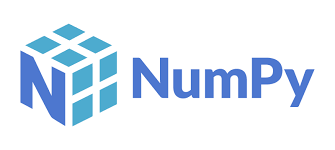

In [2]:
a = 3
b = 4

In [3]:
c = a + b

In [4]:
c = a ** 2 * (b/2)
c

18.0

In [5]:
import random

In [6]:
random

<module 'random' from 'C:\\Users\\stephen\\.conda\\envs\\intro_python_ds_tutorial\\lib\\random.py'>

In [7]:
random.random()

0.6336527907088325

In [8]:
num_values = 10

## Comprehensions
Comprehensions are an easy way to create list and dictionaries from an iterable. They are shorthand way to do repetition, and is more efficient than a normal loop.

In [9]:
old_list = []
for i1 in range(num_values):
    old_list += [random.random()]

In [10]:
old_list

[0.44501886107117694,
 0.7269063035901264,
 0.199005634353851,
 0.7593507197760909,
 0.38871704700726983,
 0.8315783161542302,
 0.28422146955102423,
 0.10635956875527097,
 0.7923837208592336,
 0.5685146076806367]

In [11]:
random_list = [random.random() * i1 for i1 in range(num_values)]

In [12]:
random_list

[0.0,
 0.018839698191753684,
 1.7348336578328751,
 0.9638450911785291,
 0.27206005053331284,
 2.3059699793873047,
 0.7734017146849841,
 6.08960735921985,
 1.022253018919998,
 3.244265992559881]

In [13]:
random_dict = {i1: random.random() * i1 for i1 in range(num_values)}

In [14]:
random_dict

{0: 0.0,
 1: 0.5040187793223974,
 2: 1.6935811775969947,
 3: 1.4663167837581976,
 4: 1.132271836891785,
 5: 4.657218509672053,
 6: 2.7421279621885706,
 7: 0.5324698342814159,
 8: 2.0714345223166024,
 9: 7.538570606405058}

## Perform operations on collection of data
The core of data science is performing an operation efficiently on many items in a collection. This can be done with loops, comprehensions or other constructs

## Apply an operation
You may want to apply the same operation to each item and get the same number of items back as you input

In [15]:
[2* val for val in random_list]

[0.0,
 0.03767939638350737,
 3.4696673156657503,
 1.9276901823570582,
 0.5441201010666257,
 4.6119399587746095,
 1.5468034293699682,
 12.1792147184397,
 2.044506037839996,
 6.488531985119762]

In [16]:
{key1: 2 * val1 for key1, val1 in random_dict.items()}

{0: 0.0,
 1: 1.0080375586447947,
 2: 3.3871623551939893,
 3: 2.9326335675163953,
 4: 2.26454367378357,
 5: 9.314437019344107,
 6: 5.484255924377141,
 7: 1.0649396685628318,
 8: 4.142869044633205,
 9: 15.077141212810115}

Another option is the map function. This applies a function to every item in a collection. This needs us to define a function. We can either do it explcitly or implictly using a lambda.

In [17]:
def double(x):
    return 2 * x

In [18]:
map(double, random_list)

In [19]:
map(lambda x: 2* x, random_list)

In python the operation is not evaluated until  the data is needed. So we get a *generator* object. It is a bit like an IOU, which says I'l, do the calculation when you actually need the result. This concept is called **lazy evaluation**. It is a key idea in python for data science, that we don't actually do the calculation immediately, rather we set up the calculation to do later. This has many advantages:

* set up computing pipline interactively
* send compute to other computing resource
* run asynchronously, so other work can be done while waiting for results.
* compute subsets 
 * serial (resource management)
 * parallel (speed)

https://wiki.python.org/moin/Generators

We can force the calculation to happen by converting the generator to a list.

In [20]:
list(map(double, random_list))

[0.0,
 0.03767939638350737,
 3.4696673156657503,
 1.9276901823570582,
 0.5441201010666257,
 4.6119399587746095,
 1.5468034293699682,
 12.1792147184397,
 2.044506037839996,
 6.488531985119762]

In [23]:
list(map(lambda x: 2* x, random_list))

[0.0,
 0.03767939638350737,
 3.4696673156657503,
 1.9276901823570582,
 0.5441201010666257,
 4.6119399587746095,
 1.5468034293699682,
 12.1792147184397,
 2.044506037839996,
 6.488531985119762]

### Reductions
Another typical operation is to combine values in some way, for example finding the average or max/min.

In [24]:
max(random_list)

6.08960735921985

In [25]:
max(random_dict.values())

7.538570606405058

In [26]:
sum(random_list)

16.42507656250849

In [27]:
len(random_list)

10

In [28]:
sum(random_list) / len(random_list)

1.642507656250849

## Numerical python with numpy
Typically, substantial calculations will be done using a third-party library called **numpy** (a contraction of numerical python). This includes many common numberical operation, as well as important data structures for arrays and matrices.

https://numpy.org/doc/

## Gridded data
Previously we have talked about tabular data with rows and columns. Another common form of data (especially in weather and climate) is gridded data. This is often seen where the data represents measrement over a map. In this case rows and columns are dimensions where the data is measured, for example latitude and longitude. Or it could be position in space in a simulation space (x,y,z). Each grid  could be one measurement, or time could be a dimension too. 

In [29]:
import numpy

In [30]:
rand_arr = numpy.random.random((10,5))
rand_arr

array([[0.08479511, 0.51269456, 0.34312421, 0.97445798, 0.61053673],
       [0.12314261, 0.04463423, 0.17365781, 0.12354435, 0.29453821],
       [0.22342336, 0.99912816, 0.77721462, 0.27778129, 0.67109798],
       [0.89168423, 0.94678849, 0.36421041, 0.71561609, 0.94407639],
       [0.22916584, 0.25051336, 0.63011312, 0.57788062, 0.46681427],
       [0.81658748, 0.68341742, 0.25767248, 0.6259969 , 0.88788952],
       [0.34543885, 0.38807415, 0.80691769, 0.2019913 , 0.29560764],
       [0.34817408, 0.37332259, 0.07467903, 0.27530991, 0.1790126 ],
       [0.55248032, 0.91759115, 0.48034981, 0.83189913, 0.19239842],
       [0.38902819, 0.92482993, 0.9506762 , 0.42035917, 0.33249237]])

This provides easier arithmetic and additional mathematical functionality. Instead of iterating through each item in the collection, we treat the data as one item.

In [31]:
rand_arr * 2

array([[0.16959022, 1.02538912, 0.68624842, 1.94891596, 1.22107347],
       [0.24628521, 0.08926846, 0.34731561, 0.24708871, 0.58907641],
       [0.44684671, 1.99825632, 1.55442924, 0.55556258, 1.34219596],
       [1.78336846, 1.89357697, 0.72842082, 1.43123218, 1.88815277],
       [0.45833168, 0.50102671, 1.26022624, 1.15576125, 0.93362855],
       [1.63317495, 1.36683484, 0.51534496, 1.2519938 , 1.77577903],
       [0.6908777 , 0.77614829, 1.61383539, 0.40398259, 0.59121527],
       [0.69634815, 0.74664518, 0.14935806, 0.55061982, 0.35802521],
       [1.10496064, 1.8351823 , 0.96069961, 1.66379825, 0.38479684],
       [0.77805637, 1.84965985, 1.9013524 , 0.84071834, 0.66498474]])

In [32]:
other_arr = numpy.random.random((10,5))

In [33]:
rand_arr + other_arr

array([[0.10256616, 0.61387167, 0.54545475, 1.7194092 , 1.41085217],
       [0.70814516, 0.98184459, 0.45112542, 0.34264506, 0.98623023],
       [0.91317829, 1.2083458 , 1.74898281, 0.56532714, 1.06364538],
       [1.24611367, 1.08002358, 0.36574655, 1.15508321, 1.15037062],
       [1.00041331, 0.77322138, 1.20237206, 1.44127746, 0.86776257],
       [0.98810847, 1.21059645, 0.44110846, 1.02483949, 1.42175039],
       [0.77333985, 0.59712914, 0.95186648, 0.50654004, 1.10553925],
       [0.38487932, 0.83039138, 0.35101713, 0.28700842, 1.1218045 ],
       [0.89720152, 1.74599147, 1.33216581, 1.71860225, 0.30564175],
       [0.90570627, 1.36453926, 1.81421946, 1.20418238, 0.58841218]])

We can reduce the whole array e.g. find the mean of the whole array, so reduce per row or column.

In [34]:
numpy.mean(rand_arr + other_arr)

0.9503317869894914

In [35]:
numpy.mean(rand_arr + other_arr, axis=0)

array([0.7919652 , 1.04059547, 0.92040589, 0.99649146, 1.0022009 ])

In [36]:
numpy.mean(rand_arr + other_arr, axis=1)

array([0.87843079, 0.69399809, 1.09989589, 0.99946753, 1.05700935,
       1.01728065, 0.78688295, 0.59502015, 1.19992056, 1.17541191])

In [ ]:
numpy.std(rand_arr + other_arr)

The other common numpy data structure is a matrix, which corrsponds to a mathematical matrix its operations. So rather than a mupltiplcation being element wise, it is proper matrix multiplication.

In [37]:
rand_arr1 = numpy.random.random((5,5))
rand_mat1 = numpy.matrix(rand_arr1)
rand_arr2 = numpy.random.random((5,5))
rand_mat2 = numpy.matrix(rand_arr2)

In [38]:
rand_arr1

array([[0.12259925, 0.98010799, 0.51957737, 0.43254498, 0.43939256],
       [0.54149163, 0.4340161 , 0.63575677, 0.10896251, 0.06887109],
       [0.64642117, 0.60862441, 0.58526178, 0.70210655, 0.21117597],
       [0.42984754, 0.30887414, 0.9553311 , 0.68818234, 0.07811864],
       [0.62624959, 0.32955122, 0.33538659, 0.83286642, 0.65009722]])

In [39]:
rand_arr2

array([[0.62388625, 0.8979798 , 0.45442599, 0.38026389, 0.87562993],
       [0.78760757, 0.31873645, 0.34260437, 0.54427532, 0.99054956],
       [0.22397074, 0.99135151, 0.18144296, 0.27786427, 0.13660449],
       [0.64251168, 0.56812377, 0.78379373, 0.16343716, 0.30505832],
       [0.76348237, 0.45040302, 0.74007008, 0.27634049, 0.6584758 ]])

In [40]:
rand_arr1 * rand_arr2

array([[0.07648798, 0.88011717, 0.23610946, 0.16448123, 0.38474528],
       [0.42648291, 0.13833675, 0.21781305, 0.0593056 , 0.06822023],
       [0.14477943, 0.60336073, 0.10619163, 0.19509032, 0.02884759],
       [0.27618206, 0.17547874, 0.74878252, 0.11247456, 0.02383074],
       [0.47813053, 0.14843086, 0.24820958, 0.23015471, 0.42807329]])

In [41]:
rand_arr1[0,0] * rand_arr2[0,0]

0.0764879841098091

In [42]:
rand_mat1 * rand_mat2

matrix([[1.57818225, 1.38121442, 1.14998255, 0.91655651, 1.57045452],
        [0.94464601, 1.34776768, 0.64649084, 0.65562845, 1.06949783],
        [1.62607278, 1.84866181, 1.31505132, 0.91279998, 1.60208547],
        [1.22722119, 1.8576704 , 1.0716999 , 0.73108235, 1.07422002],
        [1.75684649, 1.76586243, 1.59225629, 0.82646815, 1.60276114]])

In [43]:
rand_mat1[0,0] * rand_mat2[0,0] + rand_mat1[0,1] * rand_mat2[1,0] + rand_mat1[0,2] * rand_mat2[2,0] + rand_mat1[0,3] * rand_mat2[3,0] + rand_mat1[0,4] * rand_mat2[4,0] 

1.578182252008034

### Gridded data - loading data with numpy
These array and matrics we have looked are a basic form of **gridded data**. Numpy also provides facility to load and save the arrays.

In [44]:
temperature_over_area = numpy.load('temperature_array.npy')

In [45]:
temperature_over_area

array([[18.05090192, 20.66892923, 18.37048554, 20.91876376, 18.57018236,
        18.44529363, 19.29508459, 19.29082912, 20.46986608, 20.94537239],
       [18.95127915, 20.43983377, 19.47468056, 20.33069831, 20.37023327,
        20.10496052, 19.02630103, 18.16851119, 19.34132244, 18.65887918],
       [20.07716553, 20.88823731, 19.32669691, 18.92281521, 19.74691879,
        20.28514086, 19.183739  , 18.49641599, 19.94639299, 18.8612542 ],
       [18.32338158, 20.89380241, 18.7890516 , 18.66498427, 19.9782269 ,
        19.6507164 , 20.44658416, 18.06508393, 18.03652572, 20.418911  ],
       [19.57580613, 19.11774043, 20.18036861, 18.24386774, 18.31121294,
        19.84890236, 18.71623467, 20.66135428, 19.8525222 , 19.92471281],
       [19.85023776, 20.7555955 , 20.30495666, 18.36882182, 19.63473087,
        20.07055492, 18.59296162, 20.9064832 , 19.02670594, 20.64855901],
       [20.40251869, 18.32844241, 18.2162265 , 19.26700006, 19.15637431,
        20.53333001, 20.19741219, 18.7243629 

We have successfully loaded in our data, but we don't anything about it. What area is this? When was the measurement taken? What is unit, Celsuis, Fahrenheit or another? We will think about this further in the section on Data Models.

We can see here how numpy allows us to take a higher-level view of the data compared to manipulating the data directly with manual python code, abtract away some of the implementation  details. We will continue to  develop theme of higher-level objects with more abtraction. 